
# Retail Sales EDA (Exploratory Data Analysis)

This notebook performs an end-to-end EDA on a retail/online store dataset similar to the **Online Retail** dataset.
It covers:
- Loading data with **pandas**
- Cleaning (missing values, duplicates, datatypes)
- Descriptive statistics
- Visualizations (histogram, bar chart, line chart) using **matplotlib**
- Automatic extraction of **5+ business insights**



In [2]:

# == Setup ==
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Make tables easier to read
pd.set_option('display.max_colwidth', 120)
pd.set_option('display.max_columns', 50)

# Dataset
DATA_PATH = 'OnlineRetail.csv'

print('Looking for file at:', Path(DATA_PATH).resolve())


Looking for file at: D:\Nexus AI\Task 1\OnlineRetail.csv


In [3]:

# == Load Data ==
file = Path(DATA_PATH)
if not file.exists():
    raise FileNotFoundError(f"File not found: {file}. Upload it or set DATA_PATH correctly.")

if file.suffix.lower() in ['.xlsx', '.xls']:
    df = pd.read_excel(file)

elif file.suffix.lower() == '.csv':
    # Try utf-8 first, if fail then latin1
    try:
        df = pd.read_csv(file, encoding='utf-8')
    except UnicodeDecodeError:
        df = pd.read_csv(file, encoding='latin1')

else:
    raise ValueError('Unsupported file format. Please use .xlsx or .csv')

print('Shape:', df.shape)
df.head()


Shape: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:

# == Standardize column names ==
df.columns = [c.strip().replace(' ', '').replace('-', '').replace('/', '') for c in df.columns]

# Try to align common column names if present
rename_map = {
    'InvoiceNo': 'InvoiceNo',
    'StockCode': 'StockCode',
    'Description': 'Description',
    'Quantity': 'Quantity',
    'InvoiceDate': 'InvoiceDate',
    'UnitPrice': 'UnitPrice',
    'CustomerID': 'CustomerID',
    'Country': 'Country',
}
# If your dataset uses slightly different spellings (e.g., 'Customer ID'), normalize here
for k in list(rename_map.keys()):
    if k not in df.columns:
        # try a couple alternatives commonly seen
        alts = {
            'CustomerID': ['Customer Id', 'CustomerID ', 'Customer_ID', 'Customer Id '],
            'InvoiceDate': ['Invoice Date', 'InvoiceDate ', 'Date'],
            'UnitPrice': ['Unit Price', 'UnitPrice ', 'Price'],
            'InvoiceNo': ['Invoice No', 'Invoice', 'Invoice_Number'],
        }.get(k, [])
        for a in alts:
            if a in df.columns:
                df.rename(columns={a: k}, inplace=True)
                break

print('Columns:', list(df.columns))
df.info()


Columns: ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:

# == Basic Cleaning ==

# Convert InvoiceDate to datetime if present
if 'InvoiceDate' in df.columns:
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

# Remove duplicates
before = len(df)
df = df.drop_duplicates()
after = len(df)
print(f'Removed duplicates: {before - after}')

# Handle negative or zero quantities/prices if present (often returns/adjustments)
if 'Quantity' in df.columns:
    neg_q = (df['Quantity'] <= 0).sum()
    print('Non-positive quantities found:', neg_q)
if 'UnitPrice' in df.columns:
    neg_p = (df['UnitPrice'] <= 0).sum()
    print('Non-positive unit prices found:', neg_p)

# Option: Keep only positive sales lines
mask = pd.Series(True, index=df.index)
if 'Quantity' in df.columns:
    mask &= df['Quantity'] > 0
if 'UnitPrice' in df.columns:
    mask &= df['UnitPrice'] > 0
df_pos = df.loc[mask].copy()

print('Original shape:', df.shape, ' | Positive-sales subset:', df_pos.shape)
df_pos.head()


Removed duplicates: 5268
Non-positive quantities found: 10587
Non-positive unit prices found: 2512
Original shape: (536641, 8)  | Positive-sales subset: (524878, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:

# == Feature Engineering ==
if {'Quantity','UnitPrice'}.issubset(df_pos.columns):
    df_pos['TotalPrice'] = df_pos['Quantity'] * df_pos['UnitPrice']

if 'InvoiceDate' in df_pos.columns:
    df_pos['InvoiceYear'] = df_pos['InvoiceDate'].dt.year
    df_pos['InvoiceMonth'] = df_pos['InvoiceDate'].dt.month
    df_pos['InvoiceDay'] = df_pos['InvoiceDate'].dt.day
    df_pos['InvoiceHour'] = df_pos['InvoiceDate'].dt.hour

df_pos.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceHour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8


In [7]:

# == Descriptive Statistics ==

num_cols = [c for c in ['Quantity', 'UnitPrice', 'TotalPrice'] if c in df_pos.columns]
desc = df_pos[num_cols].describe().T if num_cols else pd.DataFrame()
desc


,count,mean,std,min,25%,50%,75%,max
Quantity,524878.0,10.616600,156.280031,1.000,1.00,4.00,11.00,80995.00
UnitPrice,524878.0,3.922573,36.093028,0.001,1.25,2.08,4.13,13541.33
TotalPrice,524878.0,20.275399,271.693566,0.001,3.90,9.92,17.70,168469.60


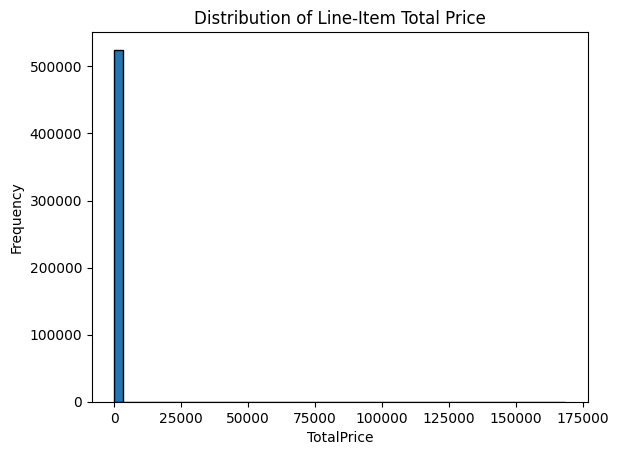

In [8]:

# == Visualization 1: Histogram of line-item TotalPrice ==
if 'TotalPrice' in df_pos.columns:
    plt.figure()
    df_pos['TotalPrice'].plot(kind='hist', bins=50, edgecolor='black')
    plt.title('Distribution of Line-Item Total Price')
    plt.xlabel('TotalPrice')
    plt.ylabel('Frequency')
    plt.show()
else:
    print('TotalPrice not available for histogram.')


,Revenue
Description,
DOTCOM POSTAGE,206248.77
REGENCY CAKESTAND 3 TIER,174156.54
"PAPER CRAFT , LITTLE BIRDIE",168469.60
WHITE HANGING HEART T-LIGHT HOLDER,106236.72
PARTY BUNTING,99445.23
JUMBO BAG RED RETROSPOT,94159.81
MEDIUM CERAMIC TOP STORAGE JAR,81700.92
POSTAGE,78101.88
Manual,77752.82


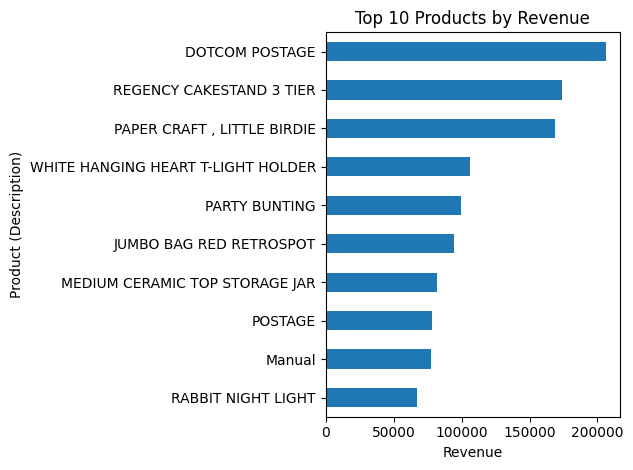

In [9]:

# == Visualization 2: Top 10 Products by Revenue (using Description) ==
if {'Description','TotalPrice'}.issubset(df_pos.columns):
    top_products = (df_pos.groupby('Description')['TotalPrice']
                    .sum()
                    .sort_values(ascending=False)
                    .head(10))
    display(top_products.to_frame('Revenue'))

    plt.figure()
    top_products.iloc[::-1].plot(kind='barh')  # horizontal bar chart
    plt.title('Top 10 Products by Revenue')
    plt.xlabel('Revenue')
    plt.ylabel('Product (Description)')
    plt.tight_layout()
    plt.show()
else:
    print('Required columns not available for top products chart.')


InvoiceDate
2010-12-01    58776.79
2010-12-02    47629.42
2010-12-03    46898.63
2010-12-04        0.00
2010-12-05    31364.63
Freq: D, Name: TotalPrice, dtype: float64

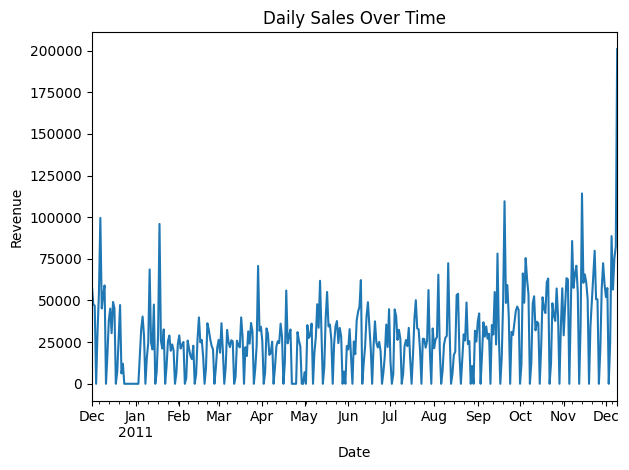

In [10]:

# == Visualization 3: Sales Over Time (daily) ==
if {'InvoiceDate','TotalPrice'}.issubset(df_pos.columns):
    daily_sales = (df_pos.set_index('InvoiceDate')['TotalPrice']
                   .resample('D').sum())
    display(daily_sales.head())

    plt.figure()
    daily_sales.plot()
    plt.title('Daily Sales Over Time')
    plt.xlabel('Date')
    plt.ylabel('Revenue')
    plt.tight_layout()
    plt.show()
else:
    print('Required columns not available for time series chart.')


In [11]:

# == Country-level revenue (optional) ==
if {'Country','TotalPrice'}.issubset(df_pos.columns):
    by_country = (df_pos.groupby('Country')['TotalPrice']
                  .sum()
                  .sort_values(ascending=False))
    display(by_country.head(15))
else:
    print('Country / TotalPrice not available.')


Country
United Kingdom    9001744.094
Netherlands        285446.340
EIRE               283140.520
Germany            228678.400
France             209625.370
Australia          138453.810
Spain               61558.560
Switzerland         57067.600
Belgium             41196.340
Sweden              38367.830
Japan               37416.370
Norway              36165.440
Portugal            33683.050
Finland             22546.080
Singapore           21279.290
Name: TotalPrice, dtype: float64

In [12]:

# == Invoice-level aggregates ==
if {'InvoiceNo','TotalPrice'}.issubset(df_pos.columns):
    invoice_summary = (df_pos.groupby('InvoiceNo')
                       .agg(InvoiceRevenue=('TotalPrice','sum'),
                            Items=('Quantity','sum')))
    display(invoice_summary.describe())
else:
    print('InvoiceNo / TotalPrice not available.')


,InvoiceRevenue,Items
count,19960.000000,19960.000000
mean,533.171884,279.179359
std,1780.412288,955.011810
min,0.380000,1.000000
25%,151.695000,69.000000
50%,303.300000,150.000000
75%,493.462500,296.000000
max,168469.600000,80995.000000


#  5 Business Insights 
1) Top Country by Revenue

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\hamaa\AppData\Local\Temp\ipykernel_9296\843634993.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")


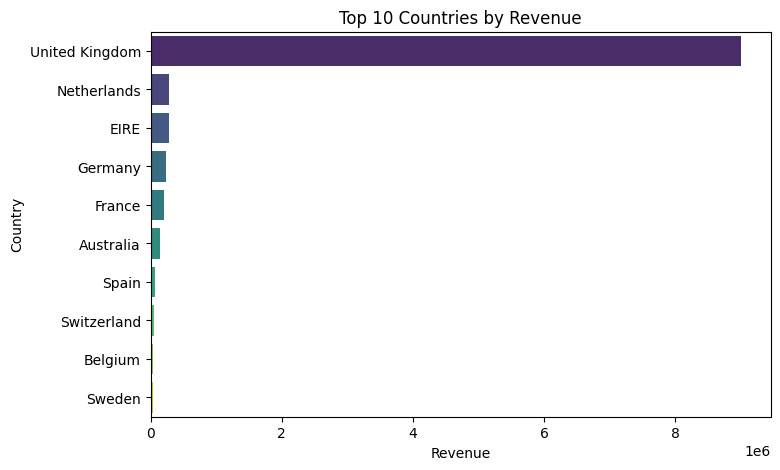

In [14]:
top_countries = df_pos.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Country")
plt.show()


2) Best-Selling Product by Revenue

C:\Users\hamaa\AppData\Local\Temp\ipykernel_9296\91603164.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="magma")


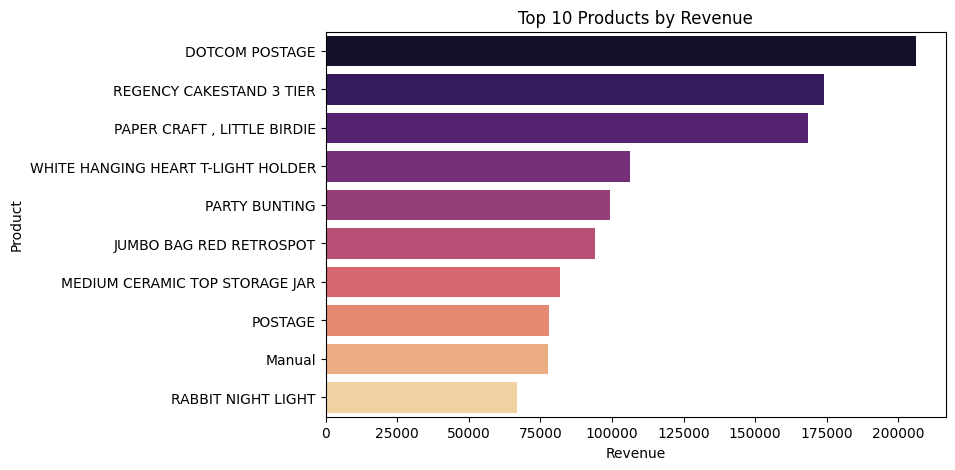

In [15]:
top_products = df_pos.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_products.values, y=top_products.index, palette="magma")
plt.title("Top 10 Products by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Product")
plt.show()


3) Peak Monthly Sales

C:\Users\hamaa\AppData\Local\Temp\ipykernel_9296\2128914827.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df_pos.set_index('InvoiceDate')['TotalPrice'].resample('M').sum()


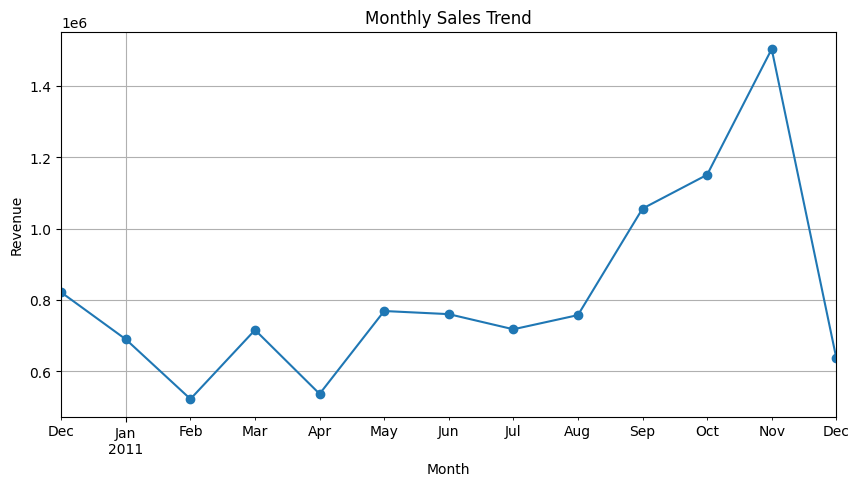

In [16]:
monthly_sales = df_pos.set_index('InvoiceDate')['TotalPrice'].resample('M').sum()

plt.figure(figsize=(10,5))
monthly_sales.plot(marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.grid(True)
plt.show()


4) Average Order Value

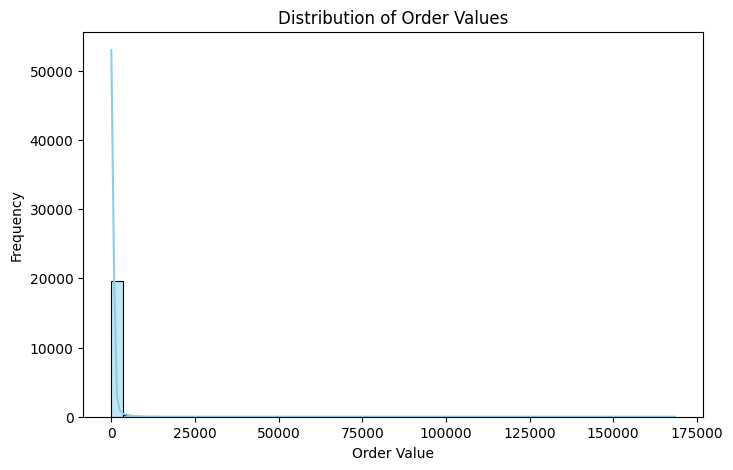

In [17]:
order_revenue = df_pos.groupby('InvoiceNo')['TotalPrice'].sum()

plt.figure(figsize=(8,5))
sns.histplot(order_revenue, bins=50, kde=True, color="skyblue")
plt.title("Distribution of Order Values")
plt.xlabel("Order Value")
plt.ylabel("Frequency")
plt.show()


5) Repeat Customers Contribution

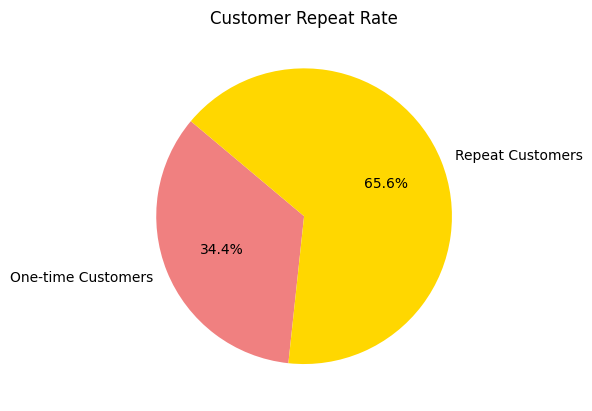

In [18]:
cust_orders = df_pos.groupby('CustomerID')['InvoiceNo'].nunique()
repeat_counts = [cust_orders[cust_orders == 1].count(), cust_orders[cust_orders > 1].count()]

plt.pie(repeat_counts, labels=['One-time Customers','Repeat Customers'],
        autopct='%1.1f%%', startangle=140, colors=['lightcoral','gold'])
plt.title("Customer Repeat Rate")
plt.show()


6) Hourly Sales Peak

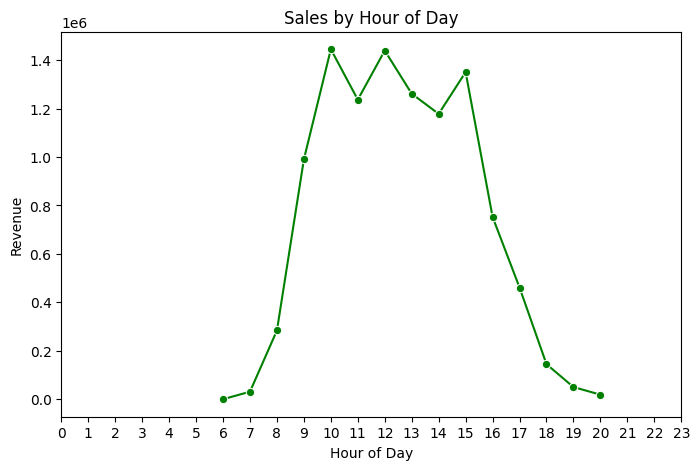

In [19]:
hourly_sales = df_pos.groupby(df_pos['InvoiceDate'].dt.hour)['TotalPrice'].sum()

plt.figure(figsize=(8,5))
sns.lineplot(x=hourly_sales.index, y=hourly_sales.values, marker="o", color="green")
plt.title("Sales by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Revenue")
plt.xticks(range(0,24))
plt.show()


In [21]:
# Save as CSV
df.to_csv("cleaned_retail.csv", index=False)


print("✅ Cleaned dataset saved as 'cleaned_retail.csv' and 'cleaned_retail.xlsx'")

✅ Cleaned dataset saved as 'cleaned_retail.csv' and 'cleaned_retail.xlsx'
